In [3]:
import pandas as pd
# importa pandas
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")
#pega a base de dados

In [4]:
df.head()
# visualiza os 5 primeiros
df.head(20)
# visualiza os 20 primeiros
df.tail(10)
# visualiza os 10 últimos
df.tail(2)
#visualiza os 2 últimos

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
133347,2020.0,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
133348,2021.0,SE,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L


In [5]:
df.info()
#verifica os tipos dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [6]:
df.describe()
# descricao mais aprofundada das informações
# count: número de valores não nulos
# mean: média
# std: desvio padrão
# min: valor mínimo
# 25%: primeiro quartil (Q1)
# 50%: mediana (Q2)
# 75%: terceiro quartil (Q3)
# max: valor máximo

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
df['work_year'].std()
# Desvio padrão baixo (como 0.68) = dados próximos entre si.
# Desvio padrão alto (ex: 10, 50...) = dados mais espalhados.

np.float64(0.6806266087848142)

In [8]:
df.shape
# número de linhas x colunas

(133349, 11)

In [9]:
linhas, colunas = df.shape[0],df.shape[1]
# criando variaveis linhas e colunas para pegarmos os valores da posicao 0 e 1 
linhas
# verificando o valor de linhas

133349

In [10]:
colunas
# verificando o valor de colunas
print('Colunas - ',colunas)

Colunas -  11


In [11]:
# verificando o valor de linhas
print('Linhas - ',linhas)

Linhas -  133349


In [12]:
df.columns
# pega o nome de colunas

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [13]:
# Dicionário, renomeando as colunas com novos nomes em portugues
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [14]:
#Qual a frequencia de categoria de cada coluna
# O método .value_counts() serve para contar quantas vezes cada valor único aparece em uma coluna.
df["senioridade"].value_counts()
#SENIOR / MID / ENTRY / EXECUTIVE

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

In [15]:
#Analisar tipo do emprego/contrato
df['contrato'].value_counts()
#FULL TIME / CONTRACT / PART TIME / FREELANCER

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [16]:
#Analisar modelo de trabalho remoto
df['remoto'].value_counts()
# 0 -- Presenciais
# 100 -- Remotos
# 50  -- Hibridos

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

In [17]:
#Tamanho da empresa
df['tamanho_empresa'].value_counts()

tamanho_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

In [18]:
#Substituir siglas de Senioridade
substitui_senior = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

#usa o map para modificar 
df['senioridade']= df['senioridade'].replace(substitui_senior)

In [19]:
df['senioridade'].value_counts()

senioridade
Senior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64

In [20]:
#Substituir siglas de Contrato
contrato_novo = {
    'FT': 'Tempo Integral',
    'PT': 'Tempo Parcial',
    'FL': 'Freelancer',
    'CT': 'Contrato'
}

#usa o map para modificar 
df['contrato']= df['contrato'].replace(contrato_novo)

In [21]:
df['contrato'].value_counts()

contrato
Tempo Integral    132563
Contrato             394
Tempo Parcial        376
Freelancer            16
Name: count, dtype: int64

In [22]:
df.describe(include='object')
#Count = contagem
#unique = dados unicos
# top = informações mais frequentes
# freq = calculo da frequencia - quantas vezes se repete a info

,senioridade,contrato,cargo,moeda,residencia,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,US,M
freq,77241,132563,17314,126140,119579,119641,129561


In [23]:
## TRATAMENTO DE DADOS ###

In [24]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,0,US,M


In [25]:
df.isnull()
# Usando isnull(), pegamos TODOS os campos vazios

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [26]:
df.isnull().sum()
# Nessa formula, adicionamos o .sum() para sabermos quantos campos faltam ser preenchidos, no caso, 
# evidenciamos que a coluna de ANO possui dados incompletos!


ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [27]:
df['ano'].unique()
# Vamos verifica os dados unicos do ano, no caso, temos o NaN (not a number)

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [28]:
df[df.isnull().any(axis=1)]
#vamos fazer uma visualização da tabela df, puxando todos os campos de df que são nulos 

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,0,US,M
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,0,DE,M
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,0,US,M
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,0,US,M
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,0,US,M
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,0,US,M
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,0,US,M
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,100,MY,L
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,100,PL,L
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,50,US,L


In [29]:
#Vamos criar um DATAFRAME do zero, chamado Salarios

import numpy as np

In [30]:
df_salarios = pd.DataFrame({
    'nome': ["carlos","andre","guilherme","caio","bruna","mikaele","dila"],
    'salario': [7200,np.nan,5000,np.nan,6230,1900,2100]
})

#CRIANDO UMA MEDIA


#df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2)) 
df_salarios['salario_media'] = df_salarios['salario'].fillna(round(df_salarios['salario'].mean(), 2))
df_salarios
# fillna preenche os valores nulos

,nome,salario,salario_media
0,carlos,7200.0,7200.0
1,andre,NaN,4486.0
2,guilherme,5000.0,5000.0
3,caio,NaN,4486.0
4,bruna,6230.0,6230.0
5,mikaele,1900.0,1900.0
6,dila,2100.0,2100.0


In [31]:
#CRIANDO UMA MEDIANA

df_salarios['salario_mediana'] = df_salarios['salario'].fillna(round(df_salarios['salario'].median(), 2))
df_salarios

,nome,salario,salario_media,salario_mediana
0,carlos,7200.0,7200.0,7200.0
1,andre,NaN,4486.0,5000.0
2,guilherme,5000.0,5000.0,5000.0
3,caio,NaN,4486.0,5000.0
4,bruna,6230.0,6230.0,6230.0
5,mikaele,1900.0,1900.0,1900.0
6,dila,2100.0,2100.0,2100.0


In [32]:

df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda','Terça','Quarta','Quinta','Sexta'],
    'Temperatura': [30, np.nan, np.nan, 25,29]
})

df_temperaturas

,Dia,Temperatura
0,Segunda,30.0
1,Terça,NaN
2,Quarta,NaN
3,Quinta,25.0
4,Sexta,29.0


In [33]:
#Criar nova coluna usando o metodo ffill do pandas
df_temperaturas['preenchido_ffill']= df_temperaturas['Temperatura'].ffill()
# ffill = forward fill, complementa com o valor anterior
df_temperaturas

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,25.0,25.0
4,Sexta,29.0,29.0


In [34]:

df_cidades = pd.DataFrame({
        'nome': ["carlos","andre","guilherme","caio","bruna","mikaele","dila"],
        'cidade': ['SAO PAULO',np.nan,np.nan,np.nan,'CURTIBA','NITEROI','DUQUE DE AXIAS']
})

df_cidades

,nome,cidade
0,carlos,SAO PAULO
1,andre,NaN
2,guilherme,NaN
3,caio,NaN
4,bruna,CURTIBA
5,mikaele,NITEROI
6,dila,DUQUE DE AXIAS


In [35]:
df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Nao Informado')
# preenche as nulls com Nao Informado
df_cidades

,nome,cidade,cidade_preenchida
0,carlos,SAO PAULO,SAO PAULO
1,andre,NaN,Nao Informado
2,guilherme,NaN,Nao Informado
3,caio,NaN,Nao Informado
4,bruna,CURTIBA,CURTIBA
5,mikaele,NITEROI,NITEROI
6,dila,DUQUE DE AXIAS,DUQUE DE AXIAS


In [36]:
#vamos agora apagar linhas que contenham vazio

#usamos dropna
df_limpo = df.dropna()
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,0,US,M


In [37]:
df_limpo.info()
# vemos que ano está em float64, mas como Ano nao precisa ser float, vamos transformar em um inteiro.

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  int64  
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 12.2+ MB


In [38]:
#mudando o tipo
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,0,US,M


In [39]:
####### EXERCICIO ###############

'''
1) Crie um DataFrame chamado df_produtos com as seguintes colunas: "produto", "preco" e "quantidade_em_estoque".

2) Adicione pelo menos 5 produtos, sendo que alguns deles devem ter valores nulos na coluna "preco" e "quantidade_em_estoque".

3) Utilize os métodos que aprendemos na aula para:
    - Identificar e contar os valores nulos em cada coluna.
    - Preencher os valores nulos da coluna "preco" com a média dos preços dos produtos.
    - Preencher os valores nulos da coluna "quantidade_em_estoque" com o valor "0" (zero).
Por fim, exiba o DataFrame resultante.
'''

'\n1) Crie um DataFrame chamado df_produtos com as seguintes colunas: "produto", "preco" e "quantidade_em_estoque".\n\n2) Adicione pelo menos 5 produtos, sendo que alguns deles devem ter valores nulos na coluna "preco" e "quantidade_em_estoque".\n\n3) Utilize os métodos que aprendemos na aula para:\n    - Identificar e contar os valores nulos em cada coluna.\n    - Preencher os valores nulos da coluna "preco" com a média dos preços dos produtos.\n    - Preencher os valores nulos da coluna "quantidade_em_estoque" com o valor "0" (zero).\nPor fim, exiba o DataFrame resultante.\n'

In [40]:
# 1 e 2#
df_produtos = pd.DataFrame({
    'produto':['trigo','arroz','feijao','macarrao','oleo','peito de frango'],
    'preco':[4.35,np.nan,4.99,5.50,17.99,np.nan],
    'quantidade_em_estoque':[150,np.nan,350,np.nan,250,np.nan]
})

df_produtos

,produto,preco,quantidade_em_estoque
0,trigo,4.35,150.0
1,arroz,NaN,NaN
2,feijao,4.99,350.0
3,macarrao,5.50,NaN
4,oleo,17.99,250.0
5,peito de frango,NaN,NaN


In [41]:
# Identificando quantos registros tem null
df_produtos.isnull().sum()


produto                  0
preco                    2
quantidade_em_estoque    3
dtype: int64

In [42]:
#Visualizando melhor todos os ISNULL existentes
df_produtos[df_produtos.isnull().any(axis=1)]


,produto,preco,quantidade_em_estoque
1,arroz,NaN,NaN
3,macarrao,5.5,NaN
5,peito de frango,NaN,NaN


In [43]:
#    - Preencher os valores nulos da coluna "preco" com a média dos preços dos produtos.
df_produtos['preco'] = df_produtos['preco'].fillna(round(df_produtos['preco'].mean(), 2))
df_produtos

,produto,preco,quantidade_em_estoque
0,trigo,4.35,150.0
1,arroz,8.21,NaN
2,feijao,4.99,350.0
3,macarrao,5.50,NaN
4,oleo,17.99,250.0
5,peito de frango,8.21,NaN


In [44]:
# - Preencher os valores nulos da coluna "quantidade_em_estoque" com o valor "0" (zero).
df_produtos['quantidade_em_estoque'] = df_produtos['quantidade_em_estoque'].fillna(0)
df_produtos


,produto,preco,quantidade_em_estoque
0,trigo,4.35,150.0
1,arroz,8.21,0.0
2,feijao,4.99,350.0
3,macarrao,5.50,0.0
4,oleo,17.99,250.0
5,peito de frango,8.21,0.0


In [45]:
#mudando o tipo pra ficar mais bonito
df_produtos = df_produtos.assign(quantidade_em_estoque = df_produtos['quantidade_em_estoque'].astype('int64'))
df_produtos

,produto,preco,quantidade_em_estoque
0,trigo,4.35,150
1,arroz,8.21,0
2,feijao,4.99,350
3,macarrao,5.50,0
4,oleo,17.99,250
5,peito de frango,8.21,0


In [46]:
#### VISUALIZAÇÃO DE DADOS , CRIACAO DE GRAFICOS #######

In [47]:
df_limpo.head()
import matplotlib

<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

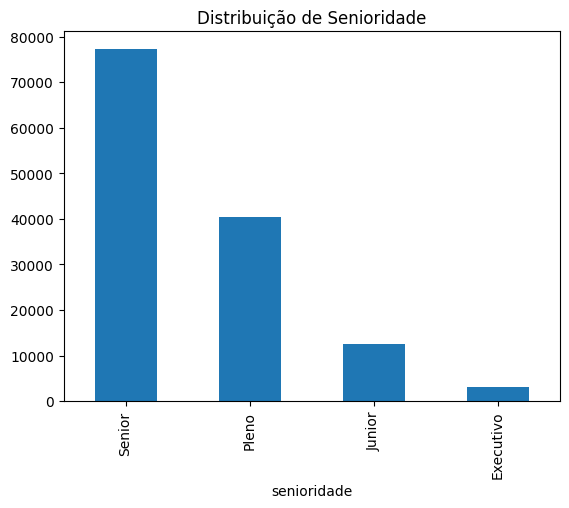

In [48]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title= 'Distribuição de Senioridade')
# usando plot, pegamos o tipo de grafico que será gerado (kind) e o titulo (title)

<Axes: title={'center': 'Tamanho da Empresa'}, xlabel='tamanho_empresa'>

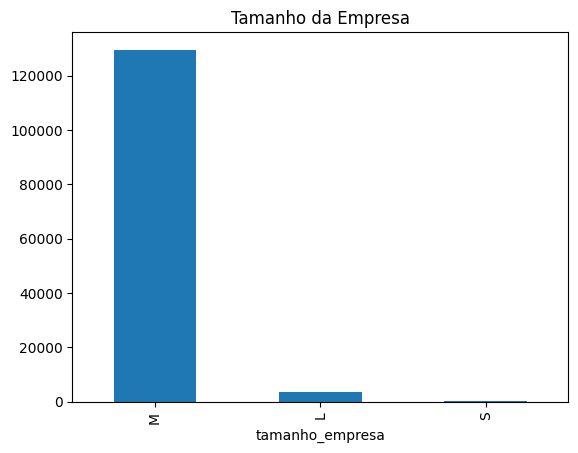

In [49]:
df_limpo['tamanho_empresa'].value_counts().plot(kind='bar', title= 'Tamanho da Empresa')


In [50]:
#alem da matplotlib, temos também a seaborn para visualizar dados


#### USANDO  SEABORN   #########
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

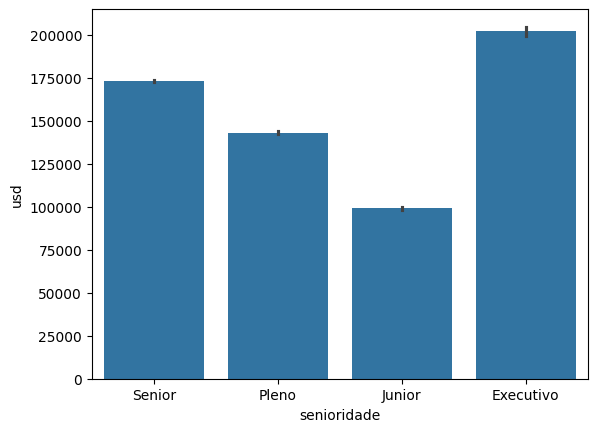

In [51]:
# Precisa passar quais sao os dados, o x e o y
sns.barplot(data = df_limpo, x='senioridade', y='usd')

In [52]:
# Agora fazendo usando o Matplotlib para customizar mais
import matplotlib.pyplot as plt

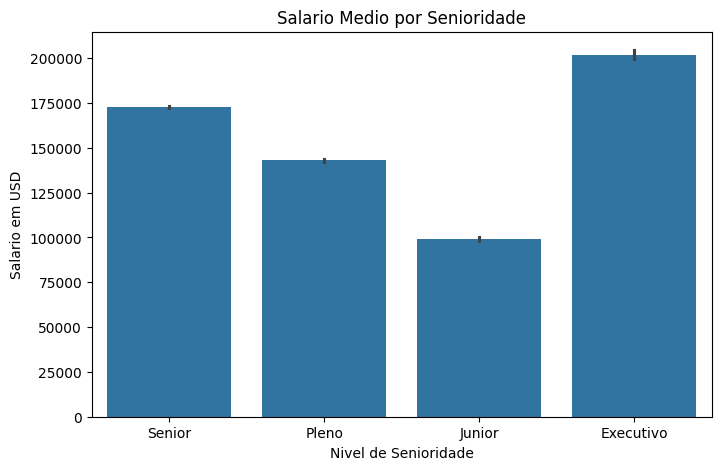

In [53]:
plt.figure(figsize=(8,5)) #aumenta o tamanho
sns.barplot(data=df_limpo,x='senioridade',y='usd')
plt.title('Salario Medio por Senioridade') #Titulo
plt.xlabel('Nivel de Senioridade')  #Titulo X
plt.ylabel('Salario em USD')   # Titulo Y
plt.show()  # Mostra o gráfico

In [54]:
# Ordenando o gráfico usando Group By
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending = False)


senioridade
Executivo    202027.667813
Senior       172850.838301
Pleno        143044.845979
Junior        99034.963267
Name: usd, dtype: float64

In [55]:
# salvando em uma variavel a ordenação
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending = False).index
ordem

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

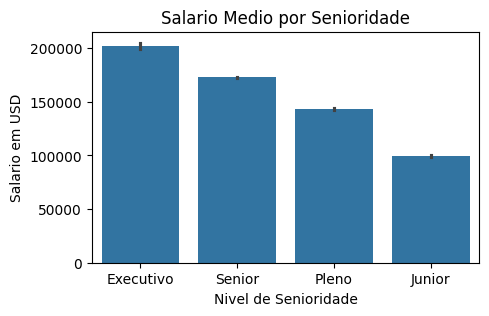

In [56]:
plt.figure(figsize=(5,3)) #aumenta o tamanho
sns.barplot(data=df_limpo,x='senioridade',y='usd',order=ordem) #adicionando a ordem
plt.title('Salario Medio por Senioridade') #Titulo
plt.xlabel('Nivel de Senioridade')  #Titulo X
plt.ylabel('Salario em USD')   # Titulo Y
plt.show()  # Mostra o gráfico

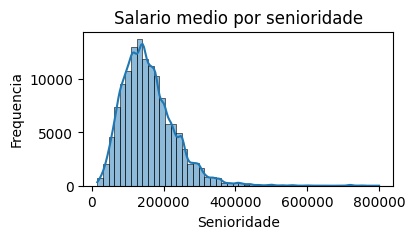

In [57]:
# Vendo agora a distribuição salarial

plt.figure(figsize=(4,2))
sns.histplot(df_limpo['usd'],bins = 50, kde= True)
# bins=50: divide os dados em 50 faixas (intervalos). Isso define a granularidade do histograma.
# kde=True: adiciona uma linha de densidade (curva suave) ao gráfico, que mostra a estimativa da distribuição dos dados.
plt.title('Salario medio por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Frequencia')
plt.show()

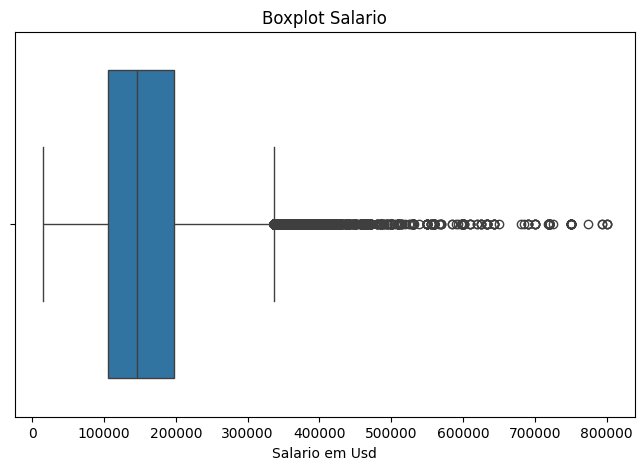

In [58]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxplot Salario')
plt.xlabel('Salario em Usd')
plt.show()

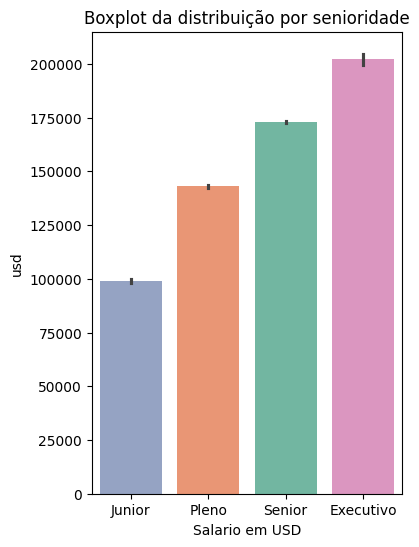

In [59]:
ordem_senioridade = ['Junior','Pleno','Senior','Executivo']
plt.figure(figsize=(4,6))
sns.barplot(data=df_limpo,x='senioridade',y ='usd', order=ordem_senioridade, palette ='Set2',hue='senioridade')
plt.title('Boxplot da distribuição por senioridade')
plt.xlabel('Salario em USD')
plt.show()

In [60]:
# GRAFICOS INTERATIVOS
# Precisa usar a biblioteca Ploty

In [61]:
import plotly.express as px

senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
            x='senioridade',
            y='usd',
            title='Média Salarial por Senioridade',
            labels={'seniroidade':'Nivel de Senioridade','usd':'Media Salarial Anual{USD}'})

fig.show()

In [62]:
# Grafico de Pizza #

In [63]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho','quantidade']

fig = px.pie(remoto_contagem,
            names = 'tipo_trabalho', 
            values='quantidade',
            title='Proporção dos tipos de trabalho',
            hole=0.3
            )

fig.update_traces(textinfo='percent+label')
fig.show()

In [64]:
# DESAFIO
# - SALARIO X PAIS no cargo cientista de Dados

In [65]:
df_limpo

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,100,US,L
133345,2021,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,100,US,L
133346,2020,Junior,Tempo Integral,Data Scientist,105000,USD,105000,US,100,US,S
133347,2020,Junior,Contrato,Business Data Analyst,100000,USD,100000,US,100,US,L


In [66]:
# O desafio da aula é gerar uma visualização de salário médio por país para o cargo de cientista de dados,
# utilizando a biblioteca Plotly para criar um gráfico interativo.

desafio = df_limpo.groupby('residencia')['salario'].mean().sort_values(ascending=False).reset_index()
desafio.columns = ['residencia','salario']

fig = px.bar(desafio,
            x = 'residencia', 
            y='salario',
            title='Proporção dos tipos de trabalho',
        
            )

fig.show()

In [67]:
df_limpo['residencia'].unique()

array(['US', 'AU', 'CA', 'JP', 'GB', 'MX', 'NL', 'ES', 'FR', 'MT', 'IT',
       'LT', 'PH', 'NZ', 'DE', 'LV', 'IE', 'MK', 'AT', 'PL', 'SK', 'BR',
       'SI', 'FI', 'HK', 'LS', 'IN', 'JM', 'CH', 'BE', 'ID', 'PE', 'SG',
       'PT', 'HU', 'RO', 'AR', 'ZA', 'PA', 'EE', 'LU', 'DZ', 'EG', 'CL',
       'GR', 'KE', 'CD', 'SE', 'KR', 'TW', 'NO', 'CZ', 'TR', 'NG', 'CY',
       'CO', 'DK', 'AE', 'BG', 'JO', 'RS', 'UA', 'PR', 'SV', 'EC', 'DO',
       'MY', 'XK', 'CR', 'ZM', 'AM', 'RW', 'IL', 'LB', 'HR', 'PK', 'HN',
       'VE', 'BM', 'VN', 'GE', 'SA', 'OM', 'BA', 'UG', 'MU', 'TH', 'QA',
       'RU', 'TN', 'GH', 'AD', 'MD', 'UZ', 'CF', 'KW', 'IR', 'AS', 'CN',
       'BO', 'IQ', 'JE'], dtype=object)

In [68]:
df_hu = df[df['residencia'] == 'HU']
df_hu

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
7034,2025.0,Junior,Tempo Integral,Developer,9000000,HUF,23086,HU,0,HU,M
7035,2025.0,Junior,Tempo Integral,Developer,7500000,HUF,19238,HU,0,HU,M
41797,2025.0,Junior,Tempo Integral,Data Scientist,9000000,HUF,23086,HU,0,HU,M
41798,2025.0,Junior,Tempo Integral,Data Scientist,7500000,HUF,19238,HU,0,HU,M
73164,2024.0,Pleno,Tempo Integral,AI Specialist,5400000,HUF,15419,HU,0,HU,M
73165,2024.0,Pleno,Tempo Integral,AI Specialist,5400000,HUF,15419,HU,0,HU,M
123146,2023.0,Junior,Tempo Integral,Analytics Engineer,43000,USD,43000,HU,0,HU,L
131985,2022.0,Junior,Tempo Integral,Data Scientist,6600000,HUF,17684,HU,100,HU,M
133179,2021.0,Pleno,Tempo Integral,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
133249,2020.0,Pleno,Tempo Integral,Data Scientist,11000000,HUF,35735,HU,50,HU,L


In [69]:
media_salario_hu = df_hu['salario'].mean()
media_salario_hu

np.float64(7244300.0)